 #   Tuning Result

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# import results
# 450 features 
hy_450_100 = pd.read_csv('../Results/RandomSearch_Tuning_450_3scores.csv')
# 50 features selected by correlation matrix
hy_50_corr_100 = pd.read_csv('../Results/RandomSearch_Tuning_50_corr_red_RF_iter100_3scores.csv')
# 50 features selected by Anova method
hy_50_Anova_100 = pd.read_csv('../Results/RandomSearch_Tuning_50_Anova_RF_iter100_3scores.csv')

In [3]:
# find best scores for different measuring metric and different features
best_r2_hyp_450 = hy_450_100.iloc[hy_450_100['r2_score'].idxmax()].copy()
best_r2_hyp_50_corr = hy_50_corr_100.iloc[hy_50_corr_100['r2_score'].idxmax()].copy()
best_r2_hyp_Anova = hy_50_Anova_100.iloc[hy_50_Anova_100['r2_score'].idxmax()].copy()

print("Best R2 score for 450-feature dataset is: %10.2f" % (best_r2_hyp_450['r2_score']))
print("Best R2 score for 50-feature (corr) dataset is: %10.2f" % (best_r2_hyp_50_corr['r2_score']))
print("Best R2 score for 50-feature (Anova) dataset is: %10.2f" % (best_r2_hyp_Anova['r2_score']))

best_mape_hyp_450 = hy_450_100.iloc[hy_450_100['mape_score'].idxmin()].copy()
best_mape_hyp_50_corr = hy_50_corr_100.iloc[hy_50_corr_100['mape_score'].idxmin()].copy()
best_mape_hyp_Anova = hy_50_Anova_100.iloc[hy_50_Anova_100['mape_score'].idxmin()].copy()

print()
print("Best MAPE score for 450-feature dataset is: %10.2f" % (best_r2_hyp_450['mape_score']))
print("Best MAPE score for 50-feature (corr) dataset is: %10.2f" % (best_r2_hyp_50_corr['mape_score']))
print("Best MAPE score for 50-feature (Anova) dataset is: %10.2f" % (best_r2_hyp_Anova['mape_score']))

best_mae_hyp_450 = hy_450_100.iloc[hy_450_100['mae_score'].idxmin()].copy()
best_mae_hyp_50_corr = hy_50_corr_100.iloc[hy_50_corr_100['mae_score'].idxmin()].copy()
best_mae_hyp_Anova = hy_50_Anova_100.iloc[hy_50_Anova_100['mae_score'].idxmin()].copy()

print()
print("Best MAE score for 450-feature dataset is: %10.2f" % (best_r2_hyp_450['mae_score']))
print("Best MAE score for 50-feature (corr) dataset is: %10.2f" % (best_r2_hyp_50_corr['mae_score']))
print("Best MAE score for 50-feature (Anova) dataset is: %10.2f" % (best_r2_hyp_Anova['mae_score']))


Best R2 score for 450-feature dataset is:       0.65
Best R2 score for 50-feature (corr) dataset is:       0.61
Best R2 score for 50-feature (Anova) dataset is:       0.58

Best MAPE score for 450-feature dataset is:       5.48
Best MAPE score for 50-feature (corr) dataset is:       5.58
Best MAPE score for 50-feature (Anova) dataset is:       5.89

Best MAE score for 450-feature dataset is:       0.27
Best MAE score for 50-feature (corr) dataset is:       0.28
Best MAE score for 50-feature (Anova) dataset is:       0.29


In [4]:
# Combine results into one dataframe
hy_450_100['data'] = '450'
hy_50_corr_100['data'] = 'corr'
hy_50_Anova_100['data'] = 'Anova'

# combine the datasets
hyp = hy_450_100.append(hy_50_corr_100)
hyp = hyp.append(hy_50_Anova_100)

hyp.head(5)

,iteration,runtime,r2_score,mape_score,mae_score,max_depth,min_samples_split,min_samples_leaf,n_estimators,hyperparameters,data
0,1,12.994802,0.608696,6.275702,0.311930,31,9,7,243,"{'bootstrap': True, 'max_depth': 31, 'max_feat...",450
1,2,342.544649,0.643937,5.374535,0.264844,73,7,3,379,"{'bootstrap': True, 'max_depth': 73, 'max_feat...",450
2,3,38.067658,0.652763,5.478812,0.271044,75,5,2,670,"{'bootstrap': False, 'max_depth': 75, 'max_fea...",450
3,4,462.625210,0.633560,5.509740,0.271870,51,10,7,631,"{'bootstrap': True, 'max_depth': 51, 'max_feat...",450
4,5,249.863118,0.360597,7.549868,0.373557,5,4,8,612,"{'bootstrap': False, 'max_depth': 5, 'max_feat...",450


/home/xinxinmo/anaconda3/lib/python3.6/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


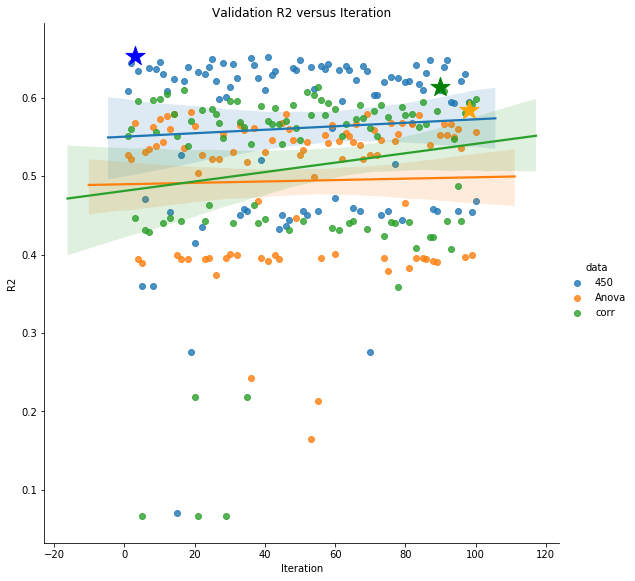

In [5]:
# R2 Score
hyp.sort_values('data', inplace = True)

# Plot of scores over the course of searching
sns.lmplot('iteration', 'r2_score', data = hyp, hue = 'data', size = 8);
plt.scatter(best_r2_hyp_450['iteration'], best_r2_hyp_450['r2_score'],  marker = '*', s = 400, c = 'blue')
plt.scatter(best_r2_hyp_50_corr['iteration'], best_r2_hyp_50_corr['r2_score'], marker = '*', s = 400, c = 'green')
plt.scatter(best_r2_hyp_Anova['iteration'], best_r2_hyp_Anova['r2_score'], marker = '*', s = 400, c = 'orange')

plt.xlabel('Iteration'); plt.ylabel('R2'); plt.title("Validation R2 versus Iteration");

/home/xinxinmo/anaconda3/lib/python3.6/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


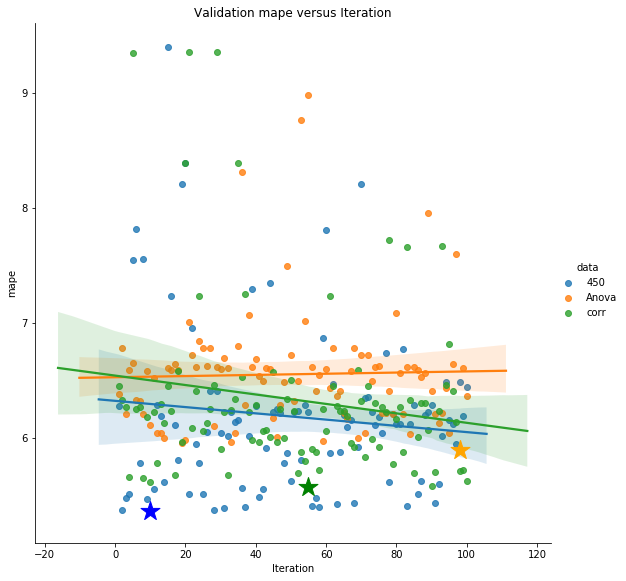

In [6]:
# MAPE Score
hyp.sort_values('data', inplace = True)

# Plot of scores over the course of searching
sns.lmplot('iteration', 'mape_score', data = hyp, hue = 'data', size = 8);
plt.scatter(best_mape_hyp_450['iteration'], best_mape_hyp_450['mape_score'],  marker = '*', s = 400, c = 'blue')
plt.scatter(best_mape_hyp_50_corr['iteration'], best_mape_hyp_50_corr['mape_score'], marker = '*', s = 400, c = 'green')
plt.scatter(best_mape_hyp_Anova['iteration'], best_mape_hyp_Anova['mape_score'], marker = '*', s = 400, c = 'orange')

plt.xlabel('Iteration'); plt.ylabel('mape'); plt.title("Validation mape versus Iteration");

/home/xinxinmo/anaconda3/lib/python3.6/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


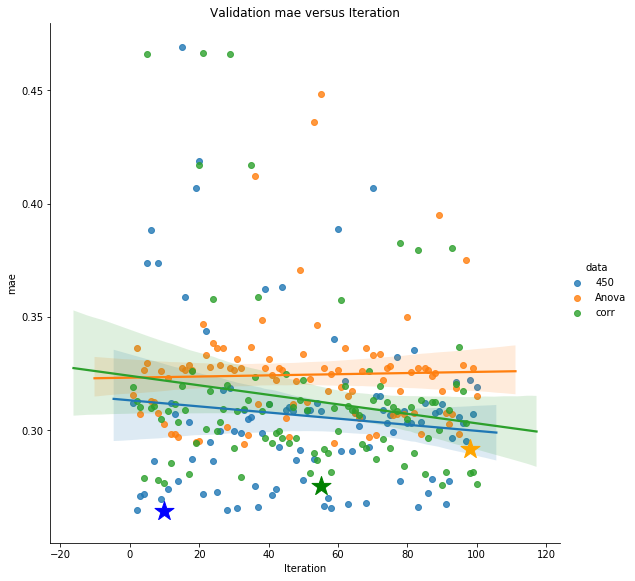

In [7]:
# MAE Score
hyp.sort_values('data', inplace = True)

# Plot of scores over the course of searching
sns.lmplot('iteration', 'mae_score', data = hyp, hue = 'data', size = 8);
plt.scatter(best_mae_hyp_450['iteration'], best_mae_hyp_450['mae_score'],  marker = '*', s = 400, c = 'blue')
plt.scatter(best_mae_hyp_50_corr['iteration'], best_mae_hyp_50_corr['mae_score'], marker = '*', s = 400, c = 'green')
plt.scatter(best_mae_hyp_Anova['iteration'], best_mae_hyp_Anova['mae_score'], marker = '*', s = 400, c = 'orange')

plt.xlabel('Iteration'); plt.ylabel('mae'); plt.title("Validation mae versus Iteration");